In [43]:
import numpy as np
import pandas as pd

from statsmodels.tsa.ar_model import AR, ARResults

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
pwd

'C:\\Users\\Muhammad Hazim'

In [7]:
df = pd.read_csv('C:\\Users\\Muhammad Hazim\\Desktop\\Data\\uspopulation.csv', index_col = 'DATE', parse_dates = True)
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
2011-06-01,311894
2011-07-01,312101
2011-08-01,312317
2011-09-01,312537


In [10]:
df.index.freq = 'MS'

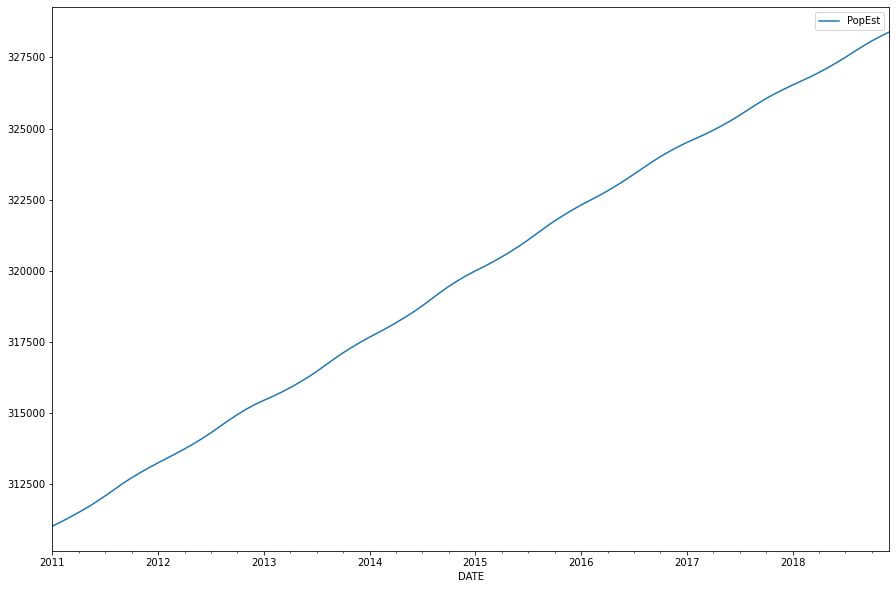

In [11]:
df.plot(figsize = (15,10))

In [13]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [17]:
len(train)

84

In [16]:
len(test)

12

In [21]:
model = AR(train['PopEst'])
AR1 = model.fit(maxlag = 1)

In [22]:
AR1.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [29]:
AR1.predict(start = 84, end = 95)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [30]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [31]:
pred1 = AR1.predict(start = 84, end = 95)

In [32]:
pred1 = pred1.rename('AR(1) Predictions')

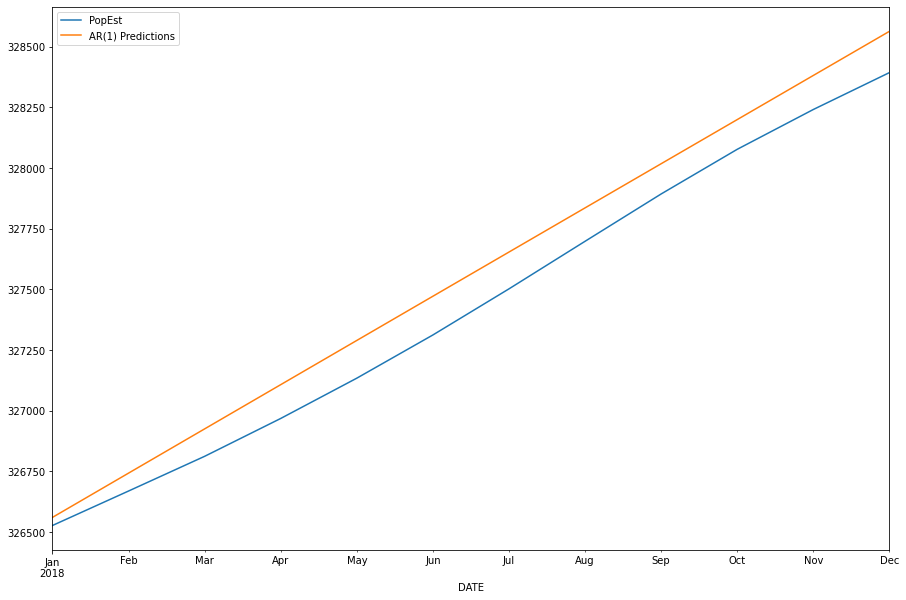

In [33]:
test.plot(figsize = (15,10), legend = True)
pred1.plot(legend = True)

In [36]:
model = AR(train['PopEst'])
AR2 = model.fit(maxlag = 2)

In [37]:
pred2 = AR2.predict(start = 84, end = 95)
pred2 = pred2.rename('AR(2) Predictions')

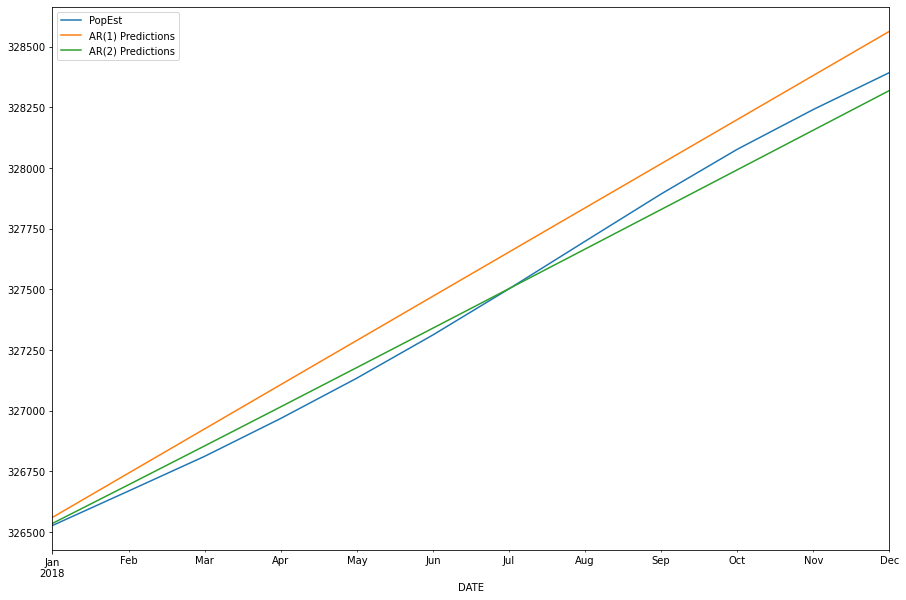

In [39]:
test.plot(figsize = (15,10), legend = True)
pred1.plot(legend = True)
pred2.plot(legend = True)

In [47]:
model = AR(train['PopEst'])
ARn = model.fit(ic = 't-stat')

In [48]:
ARn.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [50]:
pred8 = ARn.predict(start = 84, end = 95)
pred8 = pred8.rename('AR(8) Predictions')

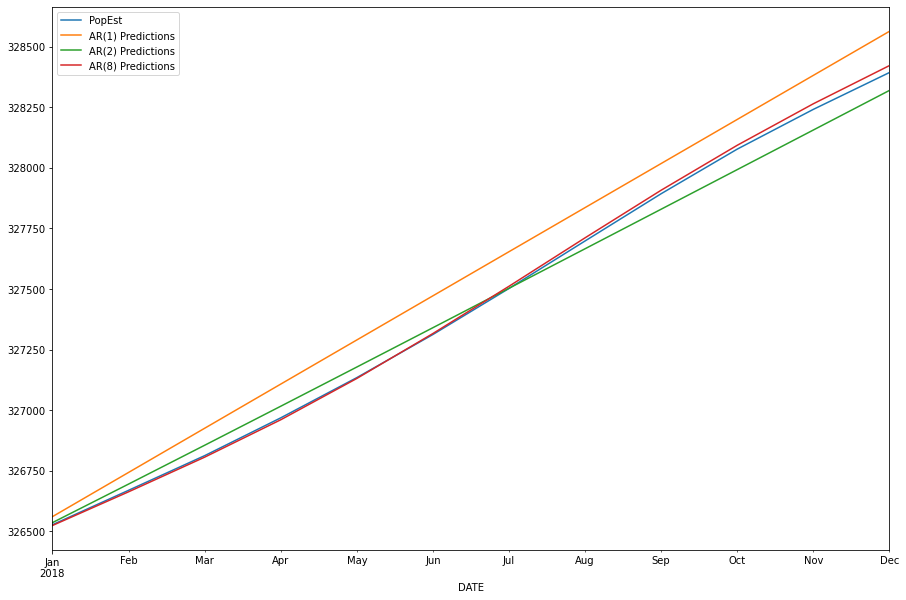

In [51]:
test.plot(figsize = (15,10), legend = True)
pred1.plot(legend = True)
pred2.plot(legend = True)
pred8.plot(legend = True)

In [52]:
labels = ['AR1', 'AR2', 'AR8']
preds = [pred1, pred2, pred8]

In [53]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714237833407
AR2 MSE was : 2713.258683668394
AR8 MSE was : 186.97263605698208


In [54]:
model = AR(df['PopEst'])
AR8 = model.fit(maxlag = 8)

In [56]:
forecasted_values = AR8.predict(start = len(df), end = len(df)+12).rename('Forecast')

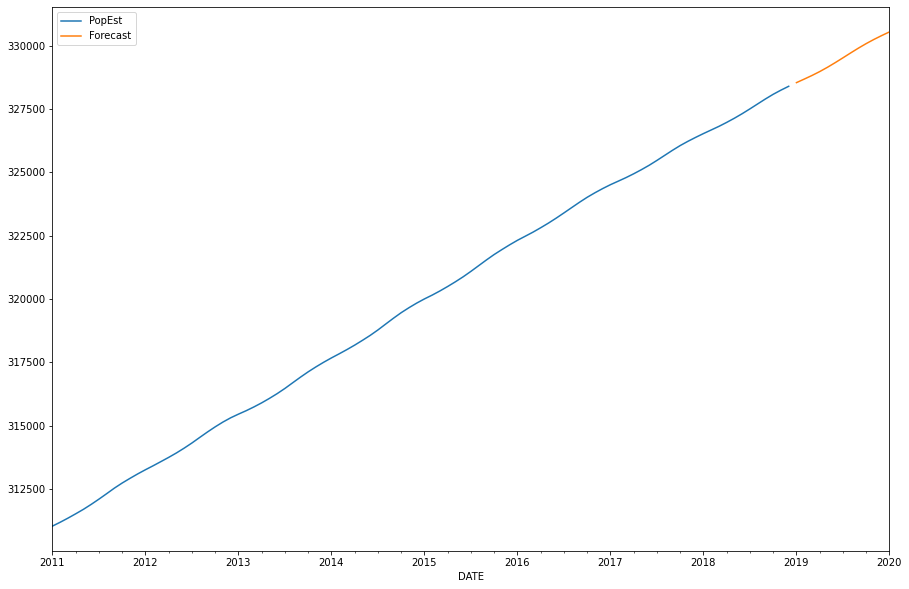

In [57]:
df['PopEst'].plot(figsize = (15,10), legend = True)
forecasted_values.plot(legend = True)